In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Utilising TensorFlow Datasets API

**Loading the MNIST Dataset**

In [2]:
fashion_mnist = tfds.load("fashion_mnist")
for item in fashion_mnist:
    print(item)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteNW88FY/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteNW88FY/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
train
test


**Inference**
- The data loaded using the TensorFlow Datasets API is of type dict
- It generates the data alongwith the splits

In [3]:
type(fashion_mnist)

dict

In [4]:
print("Keys of the Dictionary:\n", fashion_mnist.keys())
print("\nValues of the Dictionary:\n", fashion_mnist.values())

Keys of the Dictionary:
 dict_keys([Split('train'), Split('test')])

Values of the Dictionary:
 dict_values([<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>, <_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>])


**Loading only the Training Data**

In [5]:
mnist_train = tfds.load("fashion_mnist", split="train")
print(type(mnist_train))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [6]:
len(mnist_train)

60000

**Accessing the Data**

In [7]:
for item in mnist_train.take(1):
    print(type(item))
    print(item.keys())
    print(item["label"])
    # print(item["image"])

<class 'dict'>
dict_keys(['image', 'label'])
tf.Tensor(2, shape=(), dtype=int64)


**Inference**
- Each item is thus a dictionary containing the image data of the item and the label of the item

**More information about the Dataset**

In [8]:
mnist_test, info = tfds.load("fashion_mnist", with_info="true")
print(info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    

## Using TFDS in Keras Models

**Fashion MNIST Model**

In [9]:
(X_train, y_train), (X_test, y_test) = tfds.as_numpy(tfds.load(
    name="fashion_mnist",
    split=["train", "test"], 
    batch_size=-1,
    as_supervised=True
))

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [11]:
X_train = X_train / 255
X_test = X_test / 255

**Inference**
- The data when loaded using the TFDS API accounts for the channels in it automatically
- Loading the data using the **`tfds.as_numpy()`** provides the dataset as numpy arrays which can be directly passed into the model

In [12]:
fashion_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [13]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [14]:
fashion_model.compile(
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="adam"
)

In [15]:
history = fashion_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4325 - accuracy: 0.8435 - val_loss: 0.3261 - val_accuracy: 0.8777
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2742 - accuracy: 0.8984 - val_loss: 0.2738 - val_accuracy: 0.9011
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2292 - accuracy: 0.9151 - val_loss: 0.2751 - val_accuracy: 0.8977
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1993 - accuracy: 0.9260 - val_loss: 0.2479 - val_accuracy: 0.9091
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1742 - accuracy: 0.9349 - val_loss: 0.2596 - val_accuracy: 0.9105
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1529 - accuracy: 0.9427 - val_loss: 0.2753 - val_accuracy: 0.9048
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1358 - accuracy: 0.9487 - val_loss: 0.2580 - val_accuracy

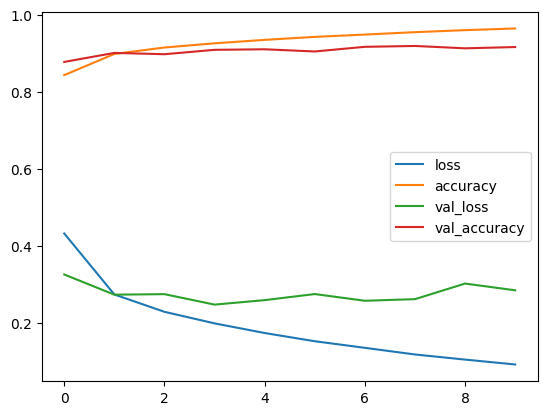

In [16]:
pd.DataFrame(history.history).plot()
plt.show()

**Horses and Humans Model**

In [17]:
horse_human_data, info = tfds.load(
    name="horses_or_humans", 
    with_info="true",
    as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteKJLQT4/horses_or_humans-train.tfrecord*..…

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteKJLQT4/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [18]:
print(info)

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_path=PosixGPath('/tmp/tmptkfgspzgtfds'),
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
)


In [19]:
data = tfds.load(
    name="horses_or_humans",
    as_supervised=True,
    split="train"
)

print(type(data))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [20]:
val_data = tfds.load(
    name="horses_or_humans", 
    split="test",
    as_supervised=True
)

print(type(val_data))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [21]:
for item in data.take(1):
    print(type(item))
    print(item)

<class 'tuple'>
(<tf.Tensor: shape=(300, 300, 3), dtype=uint8, numpy=
array([[[ 53,  55,  45],
        [ 46,  47,  40],
        [ 39,  40,  36],
        ...,
        [ 24,  25,  24],
        [ 21,  23,  21],
        [ 19,  21,  20]],

       [[ 41,  40,  34],
        [ 49,  48,  42],
        [ 54,  53,  48],
        ...,
        [ 18,  20,  19],
        [ 16,  18,  16],
        [ 16,  18,  16]],

       [[ 33,  29,  28],
        [ 50,  47,  42],
        [ 62,  58,  53],
        ...,
        [ 17,  19,  17],
        [ 15,  16,  14],
        [ 14,  15,  13]],

       ...,

       [[160, 143, 125],
        [162, 147, 129],
        [142, 128, 109],
        ...,
        [144, 124, 106],
        [141, 121, 104],
        [161, 141, 122]],

       [[142, 125, 107],
        [155, 134, 115],
        [153, 132, 113],
        ...,
        [149, 129, 113],
        [156, 134, 115],
        [163, 142, 123]],

       [[120, 101,  85],
        [123, 103,  87],
        [119, 101,  84],
        ...,
    

In [22]:
for item in val_data.take(1):
    print(type(item))
    print(item)

<class 'tuple'>
(<tf.Tensor: shape=(300, 300, 3), dtype=uint8, numpy=
array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
    

In [23]:
# Shuffling the Data by Sampling the Samples present in the buffer to create the dataset
train_batches = data.shuffle(100).batch(10)

# Batching the Validation Data
valid_batches = val_data.batch(32)

In [24]:
tf.keras.backend.clear_session()

In [25]:
horse_or_humans_model = tf.keras.models.Sequential([
    # Convolutional Layers
    # 300 x 300
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    # 150 x 150 x 64
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    # 75 x 75 x 128
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    # 37 x 37 x 128
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    # 18 x 18 x 128
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    # Hidden Layers
    # Input from ConvNet: 9 x 9 x 256
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

horse_or_humans_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 37, 37, 128)       0

In [26]:
horse_or_humans_model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"],
    optimizer="rmsprop"
)

In [27]:
history = horse_or_humans_model.fit(
    train_batches, 
    validation_data=valid_batches,
    validation_steps=1,
    epochs=20
)

Epoch 1/20
103/103 [==============================] - 7s 37ms/step - loss: 201.4685 - accuracy: 0.5735 - val_loss: 1316.6615 - val_accuracy: 0.4375
Epoch 2/20
103/103 [==============================] - 3s 25ms/step - loss: 99.9388 - accuracy: 0.5112 - val_loss: 293.6248 - val_accuracy: 0.5625
Epoch 3/20
103/103 [==============================] - 3s 25ms/step - loss: 19.8268 - accuracy: 0.6319 - val_loss: 288.7498 - val_accuracy: 0.4375
Epoch 4/20
103/103 [==============================] - 3s 25ms/step - loss: 56.0942 - accuracy: 0.6796 - val_loss: 0.4828 - val_accuracy: 0.8438
Epoch 5/20
103/103 [==============================] - 3s 25ms/step - loss: 42.7243 - accuracy: 0.7692 - val_loss: 20.1742 - val_accuracy: 0.5625
Epoch 6/20
103/103 [==============================] - 3s 25ms/step - loss: 21.4864 - accuracy: 0.8335 - val_loss: 6.7757 - val_accuracy: 0.4688
Epoch 7/20
103/103 [==============================] - 3s 25ms/step - loss: 36.6522 - accuracy: 0.8374 - val_loss: 396.0652 - va

## Applying Image Augmentation for TFDS

- Creating a Python Function with all the transformations that are to be applied
- The Python function is then used to map the data using the `.map()`

In [28]:
import tensorflow_addons as tfa

def augment_images(image, label):
    
    # Converting the Values of Pixels to Float32
    image = tf.cast(image, tf.float32)
    
    # Normalising the Image
    image = (image / 255)
    
    # Random Flips of the Image
    image = tf.image.random_flip_left_right(image)
    
    # Rotation Angle of the Image
    image = tfa.image.rotate(image, 40, interpolation="NEAREST")
    
    return image, label

/opt/conda/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [29]:
# Appling the Image Augmentation
train_new = data.map(augment_images)

In [30]:
# Shuffling the Batches
train_batches = train_new.shuffle(100).batch(32)

In [31]:
tf.keras.backend.clear_session()

In [32]:
horse_or_humans_model.fit(
    train_batches, epochs=20
)

Epoch 1/20
33/33 [==============================] - 7s 146ms/step - loss: 2.2049 - accuracy: 0.7050
Epoch 2/20
33/33 [==============================] - 5s 144ms/step - loss: 0.5042 - accuracy: 0.8909
Epoch 3/20
33/33 [==============================] - 5s 143ms/step - loss: 0.3335 - accuracy: 0.9153
Epoch 4/20
33/33 [==============================] - 5s 144ms/step - loss: 0.1989 - accuracy: 0.9192
Epoch 5/20
33/33 [==============================] - 5s 142ms/step - loss: 0.3691 - accuracy: 0.8997
Epoch 6/20
33/33 [==============================] - 5s 143ms/step - loss: 1.6031 - accuracy: 0.9241
Epoch 7/20
33/33 [==============================] - 5s 141ms/step - loss: 0.1950 - accuracy: 0.9474
Epoch 8/20
33/33 [==============================] - 5s 144ms/step - loss: 0.1399 - accuracy: 0.9669
Epoch 9/20
33/33 [==============================] - 5s 144ms/step - loss: 0.9478 - accuracy: 0.9056
Epoch 10/20
33/33 [==============================] - 5s 143ms/step - loss: 1.4207 - accuracy: 0.9241

## Utilising Custom Splits

- TFDS API provides lots of flexibility in Shuffling and making Splits of Datasets.
- It takes Slicing notation `[<start> : <stop> : <step>]`
- Here each of the slices can be integers or percentages

In [33]:
train_data = tfds.load(
    name="cats_vs_dogs", split="train[:80%]", as_supervised=True
)

valid_data = tfds.load(
    name="cats_vs_dogs", split="train[80%:90%]", as_supervised=True
)

test_data = tfds.load(
    name="cats_vs_dogs", split="train[-10%:]", as_supervised=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteRTAEY8/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [34]:
for item in train_data.take(1):
    print(type(item))
    print(item)

<class 'tuple'>
(<tf.Tensor: shape=(262, 350, 3), dtype=uint8, numpy=
array([[[242, 248, 248],
        [240, 246, 246],
        [235, 239, 238],
        ...,
        [188, 174, 127],
        [145, 133,  85],
        [161, 149, 101]],

       [[238, 244, 244],
        [239, 245, 245],
        [235, 239, 238],
        ...,
        [188, 176, 128],
        [165, 153, 105],
        [178, 168, 119]],

       [[237, 241, 240],
        [238, 242, 241],
        [232, 236, 235],
        ...,
        [200, 187, 142],
        [201, 191, 142],
        [200, 192, 143]],

       ...,

       [[130, 122,  75],
        [152, 146,  98],
        [154, 148,  98],
        ...,
        [161, 166, 136],
        [ 77,  86,  57],
        [ 71,  82,  52]],

       [[167, 159, 112],
        [105,  99,  51],
        [148, 142,  92],
        ...,
        [ 67,  73,  45],
        [ 46,  56,  29],
        [ 41,  54,  26]],

       [[138, 130,  83],
        [ 83,  77,  29],
        [135, 129,  79],
        ...,
    

In [35]:
# print("Training Set: ", [i for i, j in enumerate(train_data)][-1] + 1)
# print("Validation Set: ", [i for i, j in enumerate(valid_data)][-1] + 1)
# print("Testing Set: ", [i for i, j in enumerate(test_data)][-1] + 1)

In [36]:
def augment_cats_v_dogs(image, label):
    image = tf.cast(image, tf.float32)
    image = (image / 255)
    image = tf.image.resize(image, (300, 300))
    image = tf.image.random_flip_left_right(image)
    image = tfa.image.rotate(image, 40, interpolation="NEAREST")
    
    return image, label

def normalise_test_images(image, label):
    image = tf.cast(image, tf.float32)
    image = (image / 255)
    image = tf.image.resize(image, (300, 300))
    
    return image, label

In [37]:
train_data = train_data.map(augment_cats_v_dogs)
valid_data = valid_data.map(augment_cats_v_dogs)
test_data = test_data.map(normalise_test_images)

In [38]:
train_batches = train_data.shuffle(1024).batch(32)
valid_batches = valid_data.batch(32)

In [39]:
tf.keras.backend.clear_session()

In [40]:
cats_v_dogs_model = tf.keras.models.Sequential([
    # Convolutional Layers
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    # Hidden Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

cats_v_dogs_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 37, 37, 128)       0

In [41]:
cats_v_dogs_model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"],
    optimizer="adam"
)

In [42]:
'''cats_v_dogs_model.fit(
    train_batches, validation_data=valid_batches, validation_steps=1, epochs=20
)'''

'cats_v_dogs_model.fit(\n    train_batches, validation_data=valid_batches, validation_steps=1, epochs=20\n)'

## Understanding TFRecord

- TFDS uses TFRecords to store datasets. It downloads the dataset and caches it in the disk.
- This is done to reuse the data without having to re-load the dataset.
- Each dataset is broken down into a sequential list of file.
- Each file contains an integer list of records as its name.
- The files are split into shards incase of large datasets

In [43]:
data, info = tfds.load(
    name="mnist", with_info=True
)

print(info)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1.incompleteOI9C35',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
     

**Loading the Raw Records of TFRecordDataset**

- Loading the first shard of records from the MNIST Dataset

In [44]:
# Path to the first shard
filename = "/root/tensorflow_datasets/mnist/3.0.1/mnist-test.tfrecord-00000-of-00001"

# Acquiring the Raw Data
raw_dataset = tf.data.TFRecordDataset(filename)

for raw_record in raw_dataset.take(1):
    print(repr(raw_record))

<tf.Tensor: shape=(), dtype=string, numpy=b"\n\x85\x03\n\xf2\x02\n\x05image\x12\xe8\x02\n\xe5\x02\n\xe2\x02\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x1c\x00\x00\x00\x1c\x08\x00\x00\x00\x00Wf\x80H\x00\x00\x01)IDAT(\x91\xc5\xd2\xbdK\xc3P\x14\x05\xf0S(v\x13)\x04,.\x82\xc5Aq\xac\xedb\x1d\xdc\n.\x12\x87n\x0e\x82\x93\x7f@Q\xb2\x08\xba\tbQ0.\xe2\xe2\xd4\xb1\xa2h\x9c\x82\xba\x8a(\nq\xf0\x83Fh\x95\n6\x88\xe7R\x87\x88\xf9\xa8Y\xf5\x0e\x8f\xc7\xfd\xdd\x0b\x87\xc7\x03\xfe\xbeb\x9d\xadT\x927Q\xe3\xe9\x07:\xab\xbf\xf4\xf3\xcf\xf6\x8a\xd9\x14\xd29\xea\xb0\x1eKH\xde\xab\xea%\xaba\x1b=\xa4P/\xf5\x02\xd7\\\x07\x00\xc4=,L\xc0,>\x01@2\xf6\x12\xde\x9c\xde[t/\xb3\x0e\x87\xa2\xe2\xc2\xe0A<\xca\xb26\xd5(\x1b\xa9\xd3\xe8\x0e\xf5\x86\x17\xceE\xdarV\xae\xb7_\xf3AR\r!I\xf7(\x06m\xaaE\xbb\xb6\xac\r*\x9b$e<\xb8\xd7\xa2\x0e\x00\xd0l\x92\xb2\xd5\x15\xcc\xae'\x00\xf4m\x08O'+\xc2y\x9f\x8d\xc9\x15\x80\xfe\x99[q\x962@CN|i\xf7\xa9!=\xd7 \xab\x19\x00\xc8\xd6\xb8\xeb\xa1\xf0\xd8l\xca\xfb]\xee\xfb]*\x9fV\xe1\x07\xb7\xc

**Inference**
- This displays all the raw information stored in the image
- `\IDAT` contains chunks of Image Data
- `\IEND` marks the end of the image followed by the checksum

## ETL process for managing data in TensorFlow `(Extract-Transform-Load)`

### Anatomy of a TensorFlow Program following the ETL Process

```python
# Imports of the Program
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_addons as tfa
```

```python
# The imports are followed by the Model Definition Phase
model = tf.keras.models.Sequential([
    # ----- Many Layers -----
])

model.compile(
    # ----- Parameters -----
)
```

**`Extraction Phase`** - Loading the Dataset into the Program
```python
data = tfds.load(
    # ----- Parameters -----
)
```

**`Transformation Phase`** - Transformations are Applied on the loaded data to make it ready for Deep Learning
```python
def image_augment(image, label):
    image = tf.cast(image, tf.float32)
    # ----- Other Transformations -----
    
    return image, label

data = data.map(image_augment)
train_batches = data.shuffle(1730).batch(32)
```

**`Loading Phase`** - The Prepared Data is Loaded into the Model for Training
```python
model.fit(
    # ----- Parameters -----
)
```

**Important**
- The process of loading the prepared data into the model for training hugely determines the speed of training

## Parallelising ETL

Loading the Data - **`Extraction Phase`**

In [45]:
data, info = tfds.load(
    name="cats_vs_dogs", split="train", as_supervised=True, with_info="true"
)

print(info)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='/root/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul

In [46]:
# Loading all the Raw TFRecords
filename = "/root/tensorflow_datasets/cats_vs_dogs/4.0.0/cats_vs_dogs-train.tfrecord*"
files = tf.data.Dataset.list_files(filename)

In [47]:
print(type(files))

<class 'tensorflow.python.data.ops.shuffle_op._ShuffleDataset'>


In [48]:
# Extracting all the Records Parallely
train_dataset = files.interleave(
    tf.data.TFRecordDataset, cycle_length=4, num_parallel_calls=tf.data.experimental.AUTOTUNE
)

Transforming the Data - **`Transformation Phase`**

In [49]:
def read_tfrecord(serialised_example):
    
    # Dictionary Structure used by the Records
    feature_desc = {
        "image": tf.io.FixedLenFeature((), tf.string, ""),
        "label": tf.io.FixedLenFeature((), tf.int64, -1)
    }
    
    # Parsing the TFRecords
    example = tf.io.parse_single_example(serialised_example, feature_desc)
    
    # Decoding the Raw Image and Applying Transformations
    image = tf.io.decode_jpeg(example["image"], channels=3)
    image = tf.cast(image, tf.float32)
    image = (image / 255)
    image = tf.image.resize(image, (300, 300))
    image = tf.image.random_flip_left_right(image)
    
    return image, example["label"]

In [50]:
train_dataset = train_dataset.map(read_tfrecord, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.cache()

In [51]:
train_dataset = train_dataset.shuffle(1730).batch(32)
train_dataset = train_dataset.prefetch(tf.data.experimental.AUTOTUNE)

Training the Model - **`Loading Phase`**

In [52]:
tf.keras.backend.clear_session()

In [53]:
cats_v_dogs_model = tf.keras.models.Sequential([
    # Convolutional Layers
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(2, 2),
    
    # Hidden Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

cats_v_dogs_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 37, 37, 128)       0

In [54]:
cats_v_dogs_model.compile(
    loss="binary_crossentropy",
    metrics=["accuracy"],
    optimizer="rmsprop"
)

In [55]:
'''cats_v_dogs_model.fit(
    train_dataset, epochs=20, verbose=1
)'''

'cats_v_dogs_model.fit(\n    train_dataset, epochs=20, verbose=1\n)'